In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from os import listdir

from trainTestValSplit import getTrainTestValSplit
from definitions import ROOT_DIR
from preProcessing import preProcess
from definitions import main_activity_label_classes

In [3]:
# Plotting the number of observations in the raw dataset, with the NA values and what users have the most NA values
files = listdir('dataset/ExtraSensory/ExtraSensory.per_uuid_features_labels/')

combined = []
na_per_user = {}

for file in files:
    user = pd.read_csv('dataset/ExtraSensory/ExtraSensory.per_uuid_features_labels/' + file)
    prop_na = user.isnull().sum().sum() / (user.shape[0] * user.shape[1])
    na_per_user[file] = prop_na

    combined.append(user)

combined= pd.concat(combined, axis=0, ignore_index=True)

num_features = len([col for col in user.columns if 'label:' in col])
total_values = combined.shape[0] * combined.shape[1]

print(f"There are {combined.shape[0]} observations")
print(f"There are {len(combined.columns) - num_features} features")
print(f"There are {num_features} labels")
print(f"{(sum(combined.isna().sum()) / total_values):.4f} is a NA value")

del user, prop_na

There are 377346 observations
There are 228 features
There are 51 labels
0.2320 is a NA value


In [17]:
# Describe the distribution of na values per user
na_per_user_df = pd.DataFrame(na_per_user.values(), na_per_user.keys())
na_per_user_df.columns = ['prop_na']
na_per_user_df.describe()

,prop_na
count,60.000000
mean,0.237148
std,0.081703
min,0.098709
25%,0.184313
50%,0.220242
75%,0.282095
max,0.467861


In [22]:
# How many users have high NA values
len(na_per_user_df[na_per_user_df['prop_na'] > 0.3])

12

In [30]:
# Where are most of the NA values present
combined.isna().sum() / combined.shape[0]

timestamp                          0.000000
raw_acc:magnitude_stats:mean       0.000769
raw_acc:magnitude_stats:std        0.000769
raw_acc:magnitude_stats:moment3    0.000769
raw_acc:magnitude_stats:moment4    0.000769
                                     ...   
label:PHONE_ON_TABLE               0.569565
label:WITH_CO-WORKERS              0.703021
label:WITH_FRIENDS                 0.561638
label_source                       0.000000
Unnamed: 229                       1.000000
Length: 279, dtype: float64

In [24]:
train, test, val = getTrainTestValSplit(_dataset_path=f'{ROOT_DIR}/dataset/ExtraSensory/Processed')

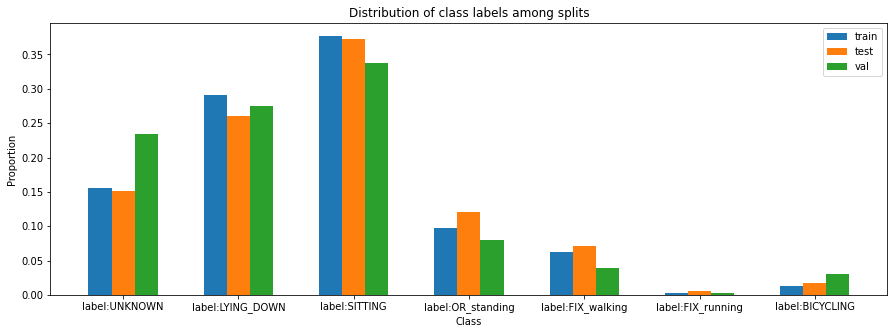

In [28]:
# What is the label distribution?
train_x, train_y = preProcess(train)
test_x, test_y = preProcess(test)
val_x, val_y = preProcess(val)
#del train_x, test_x, val_x

train_y_count = train_y.value_counts(normalize=True).sort_index()
test_y_count  = test_y.value_counts(normalize=True).sort_index()
val_y_count =  val_y.value_counts(normalize=True).sort_index()

X = main_activity_label_classes.keys()
X_axis = np.arange(len(X))

plt.figure(figsize=(15,5))
plt.bar(X_axis-0.2, train_y_count, width=0.2, label= 'train')
plt.bar(X_axis, test_y_count, width=0.2, label= 'test')
plt.bar(X_axis+0.2, val_y_count, width=0.2, label= 'val')
plt.xticks(X_axis, X)
plt.legend()
plt.ylabel('Proportion')
plt.xlabel('Class')
plt.title('Distribution of class labels among splits')
plt.show()

In [29]:
train_y

0         0
1         0
2         2
3         2
4         2
         ..
218750    4
218751    4
218752    4
218753    4
218754    4
Name: target, Length: 218755, dtype: int64

In [12]:
# We have to check for outliers
combined = pd.concat([train_x, test_x, val_x])

In [42]:
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(np.array(combined['raw_acc:3d:mean_x']).reshape(-1, 1))

In [44]:
np.unique(y_pred, return_counts=True)

array([   433, 308221], dtype=int64)